In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("session_1_data_test.csv")

In [3]:
data.head(10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0,0,0,0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0,0,0,0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0,0,0,0,snmpgetattack.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0,0,0,0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0,0,0,0,snmpgetattack.
5,0,udp,domain_u,SF,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0,0,0,0,normal.
6,0,udp,private,SF,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0,0,0,0,normal.
7,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0,0,0,0,snmpgetattack.
8,0,tcp,http,SF,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0,0,0,0,normal.
9,0,udp,private,SF,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0,0,0,0,snmpgetattack.


In [6]:
label_counts=pd.value_counts(data.label)

In [16]:
unique_label=data['label'].unique()

In [17]:
unique_label

array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
       'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
       'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
       'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
       'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
       'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
       'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
       'snmpguess.'], dtype=object)

In [7]:
label_counts

smurf.              164091
normal.              60592
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
xterm.                  13
rootkit.                13
teardrop.               12
xlock.                   9
land.                    9
xsnoop.                  4
ftp_write.               3
sqlattack.               2
loadmodule.              2
worm.                    2
perl.                    2
phf.                     2
udpstorm.                2
i

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

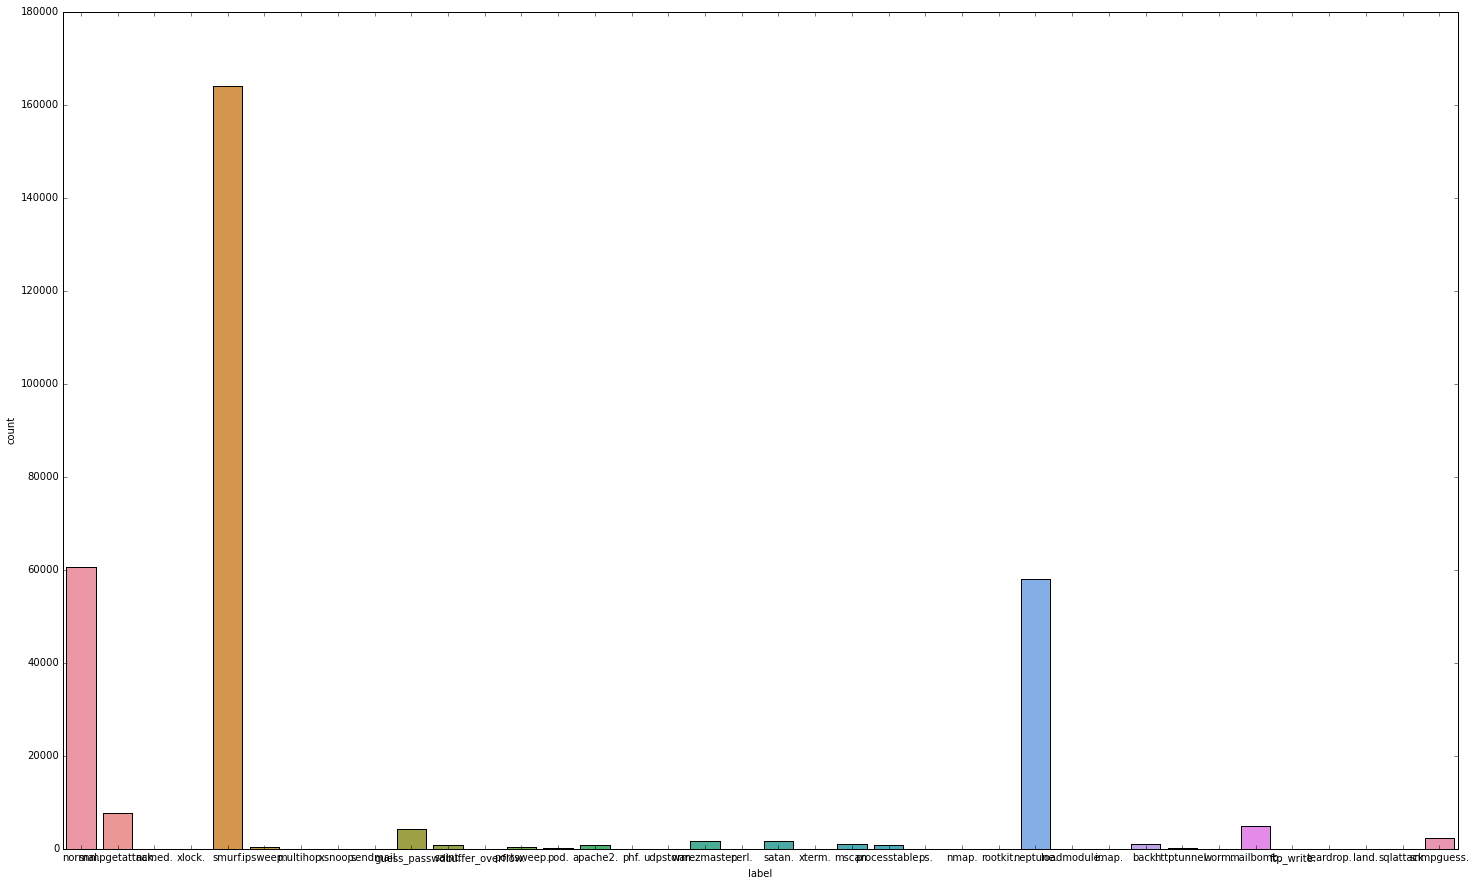

In [28]:

fig, ax = plt.subplots(figsize=(25,15))        

sns.countplot(x='label',data=data ,ax=ax)

In [6]:
# our goal is to build binary classifier first then a multiple classifier
# so introducing dummies for normal users(0) vs attacks(1)

In [18]:
def create_dummies_forloop(input_list):
    for i in range(len(input_list)):
        if i=='normal.':
            input_list[i]= 0
        else:
            input_list[i]= 1
#this takes too long...        
        

In [29]:
def create_dummies(inp):
    if inp=='normal.':
        return 0
    else :
        return 1

In [30]:
x=data['label'].apply(lambda x: create_dummies(x))

In [32]:
data['label']=data['label'].apply(lambda x: create_dummies(x))

In [36]:
data['service'].value_counts()

ecr_i          164352
private         78509
http            41237
smtp             8268
pop_3            3972
domain_u         3160
ftp_data         2223
other            2185
telnet           2077
ftp               837
eco_i             547
imap4             333
finger            291
sunrpc            195
auth              150
time               82
ntp_u              80
echo               69
domain             68
link               66
bgp                66
netstat            65
gopher             65
remote_job         65
netbios_ns         64
ctf                63
urp_i              63
uucp               62
iso_tsap           62
nntp               62
                ...  
kshell             60
name               60
ldap               59
netbios_dgm        59
nnsp               59
printer            58
rje                58
courier            58
systat             57
mtp                56
ssh                56
uucp_path          56
Z39_50             55
efs                55
sql_net   

In [ ]:
# creating dummies for service column 

In [37]:
def create_dummies_service(inp):
    if inp=='ecr_i':
        return 0
    elif inp=='private':
        return 1
    elif inp=='http':
        return 2
    elif inp=='smtp':
        return 3
    elif inp=='pop_3':
        return 4
    elif inp=='domain_u':
        return 5
    else:
        return 6   # all other comes in category 6

In [38]:
y=data['service'].apply(lambda x: create_dummies_service(x))  #all good

In [41]:
data['service']=data['service'].apply(lambda x: create_dummies_service(x))

In [46]:
data['flag'].value_counts()

SF        248378
REJ        41945
S0         18012
RSTO        1393
RSTR         872
S3           289
SH            84
S1            27
S2            22
OTH            4
RSTOS0         2
dtype: int64

In [47]:
def create_dummies_flag(inp):
    if inp=='SF':
        return 0
    elif inp=='REJ':
        return 1
    else:
        return 2

In [48]:
z=data['flag'].apply(lambda x: create_dummies_flag(x))

In [53]:
data['flag']=data['flag'].apply(lambda x: create_dummies_flag(x))

In [65]:
data['protocol_type'].value_counts()

icmp    164969
tcp     119357
udp      26702
dtype: int64

In [66]:
def create_dummies_proto(inp):
    if inp=='icmp':
        return 0
    elif inp=='tcp':
        return 1
    else:
        return 2

In [67]:
a=data['protocol_type'].apply(lambda x: create_dummies_proto(x))

In [70]:
data['protocol_type']=data['protocol_type'].apply(lambda x: create_dummies_proto(x))

In [123]:
data.head(5)   # data is ready for next steps

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,1,0,105,146,0,0,0,0,...,254,1,0.01,0.00,0,0,0,0,0,0
1,0,2,1,0,105,146,0,0,0,0,...,254,1,0.01,0.00,0,0,0,0,0,0
2,0,2,1,0,105,146,0,0,0,0,...,254,1,0.01,0.00,0,0,0,0,0,1
3,0,2,1,0,105,146,0,0,0,0,...,254,1,0.01,0.01,0,0,0,0,0,1
4,0,2,1,0,105,146,0,0,0,0,...,255,1,0.00,0.01,0,0,0,0,0,1


In [72]:
data.to_csv("data_with_dummies.csv")

In [76]:
from sklearn.ensemble import ExtraTreesClassifier 

In [91]:
model=ExtraTreesClassifier(n_estimators=500)

In [92]:
set1=data.drop('label',axis=1)
set2=data['label']


In [93]:
model.fit(set1,set2)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [90]:
print(model.feature_importances_)

[  3.53989710e-03   3.88146131e-02   1.52442797e-01   5.55669129e-03
   2.70825881e-02   2.31007666e-02   1.66381796e-05   2.94200393e-04
   1.35092136e-05   5.44420273e-03   3.05905426e-03   1.71596851e-01
   2.32563962e-03   1.52612036e-04   7.71753128e-06   7.56162946e-05
   9.32462520e-05   3.79910251e-05   2.80471136e-04   0.00000000e+00
   4.57136034e-05   1.59907276e-03   5.93352823e-02   1.09171982e-01
   9.47469068e-04   3.23035229e-03   4.94507602e-03   1.67425611e-03
   6.50038191e-03   9.83563025e-04   3.97667104e-02   8.36847441e-02
   2.01462628e-02   8.49086255e-02   5.70890204e-03   6.98437117e-02
   2.30114868e-03   2.30259960e-03   7.43637942e-03   2.63478240e-02
   3.51848405e-02]


In [94]:
len((model.feature_importances_))

41

In [99]:
len(list(data))

42

In [105]:
len(list(data)[:-1])

41

In [129]:
imp=[]
for i,j in zip(list(data)[:-1],model.feature_importances_):
    a=[i,j]
    imp.append(a)

In [140]:
def get_key(item):
    return item[1]
sorted_list=sorted(imp,key=get_key)

In [141]:
sorted_list

[['num_outbound_cmds', 0.0],
 ['land', 3.3198887139284978e-06],
 ['su_attempted', 9.9308450193499269e-06],
 ['urgent', 2.6861918730727789e-05],
 ['is_host_login', 5.5522319869991119e-05],
 ['num_shells', 5.8092616420283251e-05],
 ['num_file_creations', 7.4395523197848525e-05],
 ['num_root', 8.6070430570183831e-05],
 ['root_shell', 0.0001273656204204235],
 ['wrong_fragment', 0.00027156711307819217],
 ['num_access_files', 0.00029978776571055446],
 ['num_failed_logins', 0.0020717955394144887],
 ['num_compromised', 0.0022737648774581514],
 ['is_guest_login', 0.0024764668463795932],
 ['duration', 0.0030966143277703405],
 ['diff_srv_rate', 0.0031365288637012598],
 ['hot', 0.0041136925145386187],
 ['dst_host_serror_rate', 0.0041997512058421123],
 ['serror_rate', 0.0056480659061544881],
 ['dst_host_srv_diff_host_rate', 0.0058745772014583445],
 ['srv_serror_rate', 0.0074522569867048073],
 ['dst_host_srv_serror_rate', 0.0077440880494944056],
 ['srv_rerror_rate', 0.010863252213130085],
 ['dst_hos

In [126]:
features=[]
importance=[]
for i,j in zip(list(data)[:-1],model.feature_importances_):
    features.append(i)
    importance.append(j)

In [127]:
m=features
n=importance

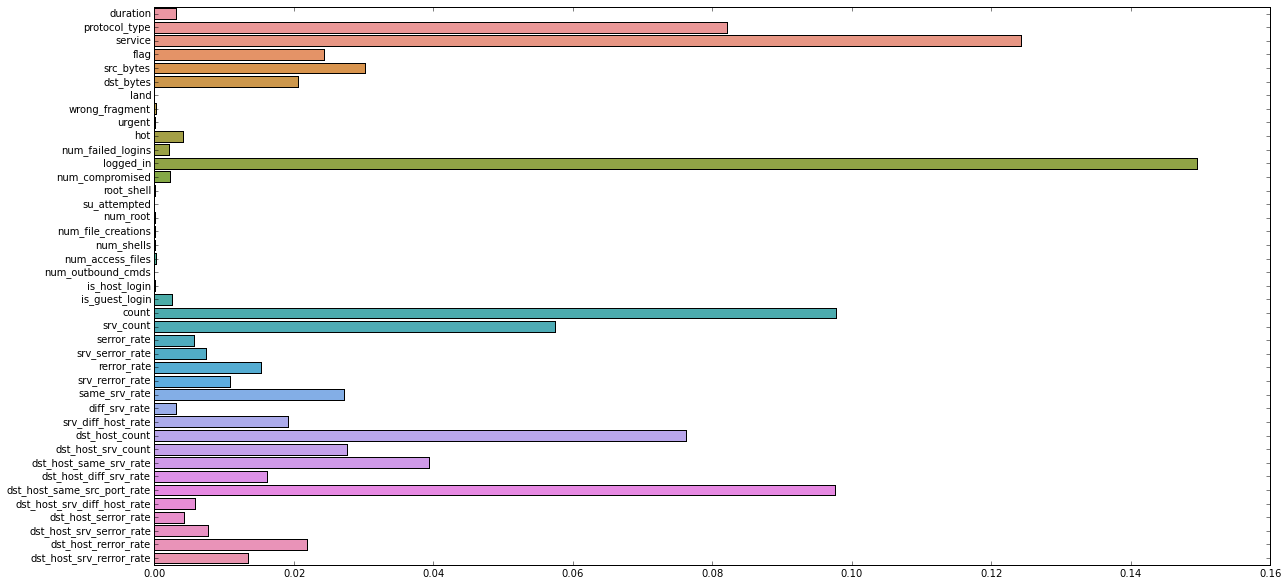

In [136]:
fig, axes = plt.subplots(figsize=(20,10))        
sns.barplot(x=n,y=m,ax=axes)

In [142]:
feat_list=[]
imp_list=[]
for i in sorted_list:
    feat_list.append(i[0])
    imp_list.append(i[1])
    
    

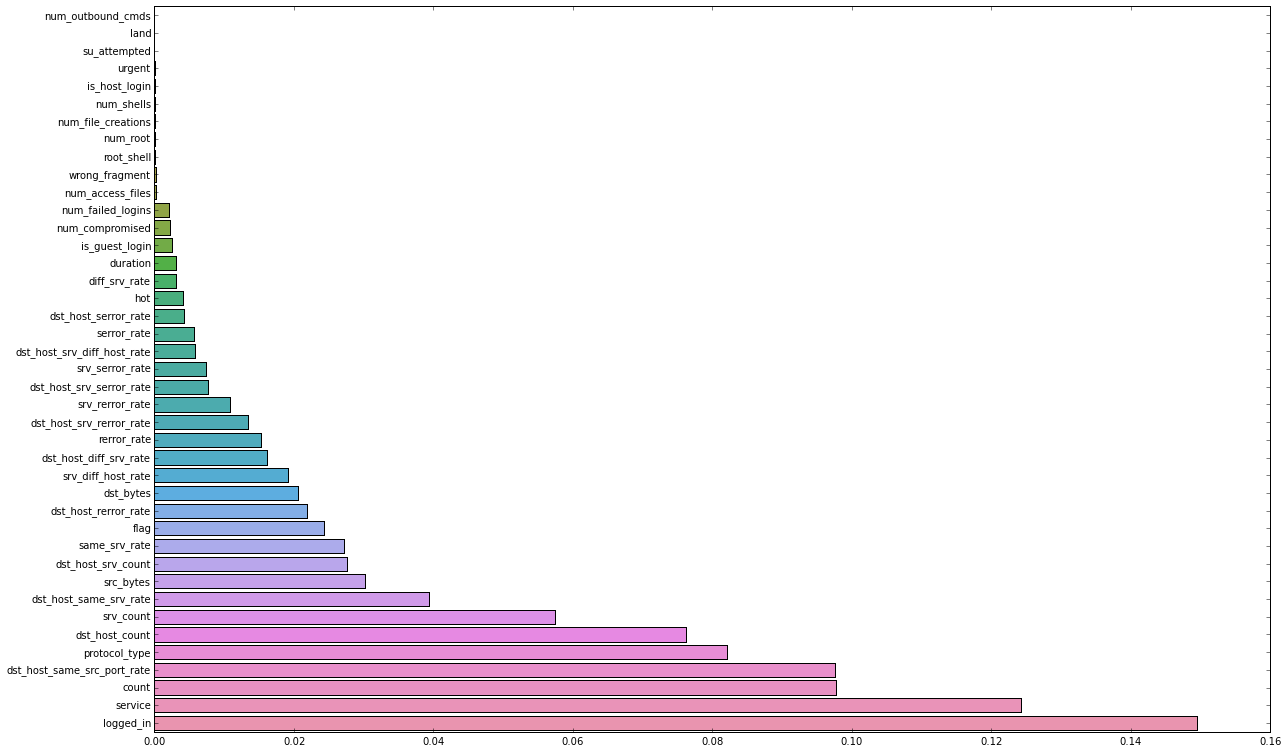

In [145]:
fig, axes = plt.subplots(figsize=(20,13))        
sns.barplot(y=feat_list,x=imp_list,ax=axes)